# WeatherPy
----

### Analysis
* Temperature becomes warmer when one approaches the equeater (0 degrees latitude). Further, the southern hemisphere (<0 degrees latitude) is significantly warmer than the northern hemisphere (>0 degrees latitude) in January.
* There is no strong relationship between latitude and humidity.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at around 0, 75, and 90% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a larger group of cities with over 20 mph of wind.

---

#### Note
* Python version: 3.7
* Author: Grace Hsu
* Create a folder where you have the .jpyn file called "output_data"

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# Note: Create your own folder called output_data in the location of the jupyter notebook prior to creating the csv file.
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = np.array(list(zip(lats, lngs)))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list. Set a limit to 601 or less cities so we will not
    # exceed 600 calls to the API openweathermap
    if len(cities) < 601:
        if city not in cities:
            cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
units = "imperial"
base_url = "https://api.openweathermap.org/data/2.5/weather?"
query_url = f"{base_url}appid={api_key}&units={units}&q="

In [4]:
# create a list to store weather data for each city
city_names = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []


print("Beginning Data Retrieval")
print("-----------------------------")


record = 1
record_set = 1


for city in cities:
    response = requests.get(query_url + city).json()
    
    if response["cod"] == '404':
        print("City not found. Skipping...")
    else:
        city_names.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        
        
        print(f'Processing Record {record} of Set {record_set} | {city}')
        record += 1

    # create count for processing records. Split into groups of 50 cities for easier viewing.
    if record == 51:
        record_set += 1
        record = 1

print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | komsomolskiy
Processing Record 3 of Set 1 | pilar
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | norman wells
City not found. Skipping...
Processing Record 6 of Set 1 | provideniya
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | bahia blanca
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | daru
Processing Record 12 of Set 1 | hanmer springs
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | laguna
Processing Record 15 of Set 1 | tual
Processing Record 16 of Set 1 | anadyr
Processing Record 17 of Set 1 | kununurra
Processing Record 18 of Set 1 | barra
Processing Record 19 of Set 1 | belonia
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | sao gabriel da cachoeira
Processing Record 22 of Set 1 | mataura
Proces

City not found. Skipping...
Processing Record 32 of Set 4 | sungaipenuh
Processing Record 33 of Set 4 | kalianget
Processing Record 34 of Set 4 | narsaq
Processing Record 35 of Set 4 | meulaboh
Processing Record 36 of Set 4 | chalon-sur-saone
Processing Record 37 of Set 4 | nanortalik
Processing Record 38 of Set 4 | pacific grove
Processing Record 39 of Set 4 | east london
Processing Record 40 of Set 4 | dikson
Processing Record 41 of Set 4 | gisborne
Processing Record 42 of Set 4 | klaksvik
Processing Record 43 of Set 4 | coihaique
Processing Record 44 of Set 4 | inyonga
Processing Record 45 of Set 4 | lompoc
City not found. Skipping...
Processing Record 46 of Set 4 | cayenne
Processing Record 47 of Set 4 | paamiut
Processing Record 48 of Set 4 | ola
Processing Record 49 of Set 4 | ust-omchug
Processing Record 50 of Set 4 | portree
Processing Record 1 of Set 5 | shingu
City not found. Skipping...
Processing Record 2 of Set 5 | barrow
Processing Record 3 of Set 5 | riyadh
Processing Re

Processing Record 18 of Set 8 | talcahuano
City not found. Skipping...
Processing Record 19 of Set 8 | sitka
Processing Record 20 of Set 8 | mandalgovi
Processing Record 21 of Set 8 | fare
Processing Record 22 of Set 8 | alkhazurovo
Processing Record 23 of Set 8 | marsh harbour
Processing Record 24 of Set 8 | menongue
Processing Record 25 of Set 8 | nenjiang
Processing Record 26 of Set 8 | leshukonskoye
Processing Record 27 of Set 8 | aden
Processing Record 28 of Set 8 | ulladulla
Processing Record 29 of Set 8 | dolzhanskaya
Processing Record 30 of Set 8 | sechura
Processing Record 31 of Set 8 | jacksonville
Processing Record 32 of Set 8 | yarada
Processing Record 33 of Set 8 | margate
Processing Record 34 of Set 8 | placido de castro
Processing Record 35 of Set 8 | sistranda
Processing Record 36 of Set 8 | peace river
Processing Record 37 of Set 8 | luderitz
Processing Record 38 of Set 8 | campobasso
Processing Record 39 of Set 8 | gamovo
City not found. Skipping...
Processing Record 

In [5]:
all_weather_data = pd.DataFrame({
    "City": city_names,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
})

In [6]:
all_weather_data.count()

City          534
Cloudiness    534
Country       534
Date          534
Humidity      534
Latitude      534
Longitude     534
Max Temp      534
Wind Speed    534
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Export city data into .csv
# Create your own folder called output_data in order for export to work
all_weather_data.to_csv(output_data_file)

In [8]:
# display dataframe

all_weather_data.count()

City          534
Cloudiness    534
Country       534
Date          534
Humidity      534
Latitude      534
Longitude     534
Max Temp      534
Wind Speed    534
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

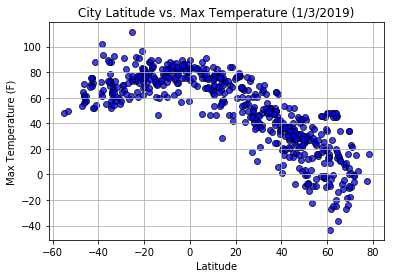

In [13]:
plt.scatter(all_weather_data["Latitude"], all_weather_data["Max Temp"], marker = 'o', facecolors='blue', edgecolors = 'black',
           alpha = 0.75)

plt.title("City Latitude vs. Max Temperature (1/3/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_data/lat_vs_max_temp.png")

#### Latitude vs. Humidity Plot

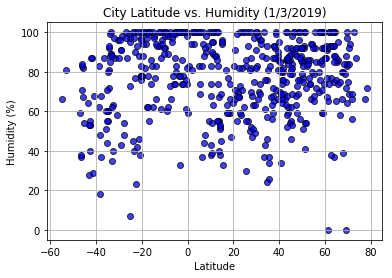

In [14]:
plt.scatter(all_weather_data["Latitude"], all_weather_data["Humidity"], marker = 'o', facecolors='blue', edgecolors = 'black',
           alpha = 0.75)

plt.title("City Latitude vs. Humidity (1/3/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/lat_vs_humidity.png")

#### Latitude vs. Cloudiness Plot

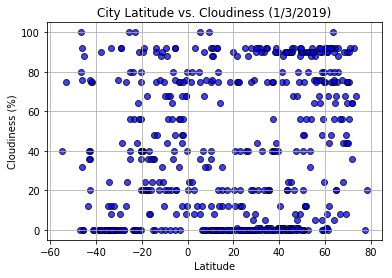

In [15]:
plt.scatter(all_weather_data["Latitude"], all_weather_data["Cloudiness"], marker = 'o', facecolors='blue', edgecolors = 'black',
           alpha = 0.75)

plt.title("City Latitude vs. Cloudiness (1/3/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/lat_vs_cloudiness.png")

#### Latitude vs. Wind Speed Plot

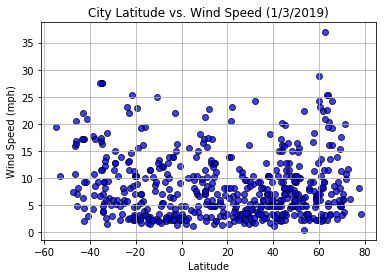

In [16]:
plt.scatter(all_weather_data["Latitude"], all_weather_data["Wind Speed"], marker = 'o', facecolors='blue', edgecolors = 'black',
           alpha = 0.75)

plt.title("City Latitude vs. Wind Speed (1/3/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_data/lat_vs_wind_speed.png")